# MACHINE LEARNING  (by Prof.Krystyn Gutu)
# PROJECT1: AMAZON STOCK ANALYSIS
## CRN:-74016 ; FALL 2023
## Submitted by: Piyush Gupta


## Step 1: Import Necessary Libraries

**1. Yfinance is used to fetch financial data from Yahoo Finance. <br>
2. Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.<br>Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.<br>
3. Train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for Testing data. With this function, you don't need to divide the dataset manually.<br>
4. Accuracy_score: In multilabel classification, this function computes subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.<br>
5. Classification_report: Builds a text report showing the main classification metrics.<br>
6. KNeighborsClassifier: Classifier implementing the k-nearest neighbors vote.<br>
7. RandomForestClassifier: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.<br>
8. GradientBoostingClassifier: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.<br>
9. SVC: C-Support Vector Classification<br>
10. XGBClassifier: Implementation of the scikit-learn classifier interface for XGBoost.<br>11. Seaborn & Matplotlib: For Data Visualizations**

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Importing Amazon's stock data from Yahoo Finance

**The download function from the yfinance library (aliased as yf) is used to download the Amazon (AMZN) data. <br> The start and end parameters define the date range of the data we are interested in (from January 1, 2015 to October 4th, 2023).**

In [2]:
amzn_data = yf.download("AMZN", start="2015-01-01", end="2023-10-04")

# Displaying the downloaded data
# The amzn_data variable now contains a DataFrame with the historical stock data for Amazon.
# Using the variable name at the end like this in a Jupyter notebook cell will display the data in the cell's output.


amzn_data_strat1 = amzn_data.copy() # to be used in strategy 1
amzn_data_strat2 = amzn_data.copy() # to be used in strategy 2
amzn_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600


## Step 3: Data pre-processing

**1. Checking the shape of the dataset - <br>The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**


In [3]:
amzn_data.shape

(2203, 6)

**2. Descriptive Statistics of the Dataset - <br> The describe() method generates descriptive statistics of DataFrame. It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset.This method will return count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the columns. This helps in understanding the distribution and spread of values in each column of the dataset.**

In [4]:
amzn_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2.203000e+03
mean,90.643222,91.697018,89.482365,90.603260,90.603260,8.087675e+07
std,48.664649,49.274293,47.988292,48.610017,48.610017,4.078749e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,42.585751,42.731750,42.363249,42.612501,42.612501,5.462200e+07
50%,89.651497,90.300003,88.629997,89.613998,89.613998,6.948600e+07
75%,129.980247,131.375000,128.205002,129.395004,129.395004,9.416700e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


**3. Checking DataTypes of each column - <br>The dtypes attribute returns the data types of each column in the DataFrame. Understanding the data types of each column is crucial for further data processing and analysis. For example, if a column that is supposed to be numeric is identified as an object (string), you might need to convert it.**

In [5]:
amzn_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**Checking for Missing Values - <br> The isnull() method returns a DataFrame of the same shape as the original, where each entry is a Boolean value that indicates whether the corresponding value in the original DataFrame is missing (NaN). True represents a missing value, and False represents a non-missing value.**

In [6]:
amzn_data.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,False,False,False,False,False,False
2015-01-05,False,False,False,False,False,False
2015-01-06,False,False,False,False,False,False
2015-01-07,False,False,False,False,False,False
2015-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-09-27,False,False,False,False,False,False
2023-09-28,False,False,False,False,False,False
2023-09-29,False,False,False,False,False,False


**Summarizing Missing Values Per Column - <br>This line of code will give you a Series where the index is the column names and the values are the counts of missing values in each column.**

In [7]:
amzn_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
amzn_data_strat1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600


**Compute the Correlation Matrix - <br> 1. The corr() function calculates the pairwise correlation of columns, excluding NA/null values.The correlation coefficient ranges from -1 to 1. <br>1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.<br> 2. Heatmaps are great for visually representing correlation matrices as it provides an easily interpretable color-coded matrix.**

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999737  0.999682  0.999354   0.999354 -0.049662
High       0.999737  1.000000  0.999613  0.999696   0.999696 -0.043780
Low        0.999682  0.999613  1.000000  0.999709   0.999709 -0.057947
Close      0.999354  0.999696  0.999709  1.000000   1.000000 -0.050991
Adj Close  0.999354  0.999696  0.999709  1.000000   1.000000 -0.050991
Volume    -0.049662 -0.043780 -0.057947 -0.050991  -0.050991  1.000000


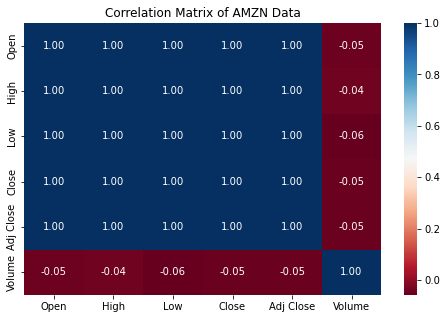

In [9]:
correlation_matrix = amzn_data.corr()
# Display the Correlation Matrix
# Print the calculated correlation matrix. This gives a tabular representation of the correlations between different features.
print(correlation_matrix)

# Visualize the Correlation Matrix Using a Heatmap

plt.figure(figsize=(8, 5))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")  # Plot the correlation heatmap with specified parameters
plt.title("Correlation Matrix of AMZN Data") # Add title

# Display the heatmap
plt.show()


**Checking for Outliers in Each Column using IQR method -**

Column: Open
No outliers found for this column.


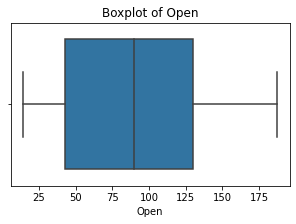

Column: High
No outliers found for this column.


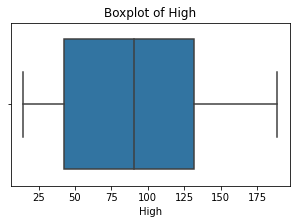

Column: Low
No outliers found for this column.


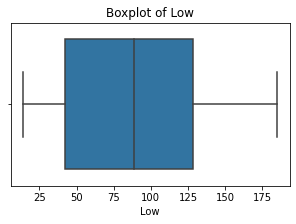

Column: Close
No outliers found for this column.


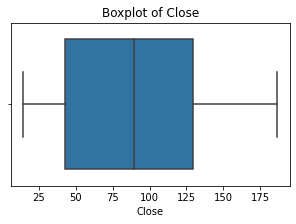

Column: Adj Close
No outliers found for this column.


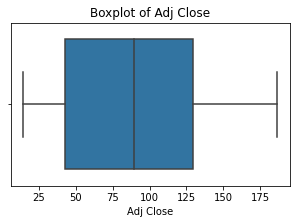

Column: Volume
Outliers:
               Volume
Date                 
2015-01-21  201302000
2015-01-29  173132000
2015-01-30  477122000
2015-02-02  204638000
2015-04-23  159600000
...               ...
2022-02-04  253456000
2022-04-29  272662000
2022-10-28  223133400
2022-11-10  173414900
2023-02-02  158154200

[114 rows x 1 columns]


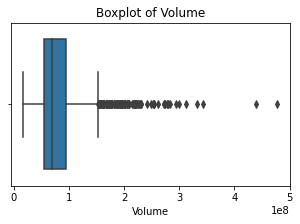

In [10]:
# Iterating over each column in the DataFrame
for col in amzn_data.columns:
    # Checking if the column is numerical since boxplots and IQR method are applicable to numerical data
    if amzn_data[col].dtype in ['int64', 'float64']:
        
        # Calculating the first (Q1) and third (Q3) quartiles and the Interquartile Range (IQR)
        Q1 = amzn_data[col].quantile(0.25)
        Q3 = amzn_data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Defining bounds for the outliers based on the IQR method
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying the outliers in the column, which are the values lying outside the defined bounds
        outliers = amzn_data[(amzn_data[col] < lower_bound) | (amzn_data[col] > upper_bound)]
        
        # Printing information about the column, whether or not there are outliers
        print(f"Column: {col}")
        if not outliers.empty:
            print("Outliers:")
            print(outliers[[col]])
        else:
            print("No outliers found for this column.")
        
        # Creating a new figure for the boxplot
        plt.figure(figsize=(5, 3))
        # Plotting a boxplot for the current numerical column
        sns.boxplot(x=amzn_data[col])

        # Setting the title for the boxplot
        plt.title(f'Boxplot of {col}')
        # Displaying the boxplot
        plt.show()


**Analysis 1: Total volumes of shares traded yearwise<br><br> This analysis aims to aggregate and understand the yearly trading activity of Amazon shares. By extracting the total trading volumes year-wise, stakeholders can identify trends, variations, or anomalies in trading volume over the years, indicating market interest, investor sentiment, or the company's overall performance and events during those periods.**

In [11]:
# The index of the DataFrame 'amzn_data' is converted to a DateTime object.
amzn_data.index = pd.to_datetime(amzn_data.index)

# After converting the index to DateTime, we can extract the year from each date and store it in a new column named 'Year'.
# This can be useful for later analysis where data needs to be grouped or analyzed based on the year.
amzn_data['Year'] = amzn_data.index.year

In [12]:
# Here we are grouping the data in 'amzn_data' by 'Year' and then calculating the sum of 'Volume' for each year.
# This provides the total volume of Amazon shares traded on the stock market for each year.
maxshares = amzn_data.groupby('Year')['Volume'].sum().reset_index()

# Displaying the Result
print(maxshares)

   Year       Volume
0  2015  19142040000
1  2016  20775126000
2  2017  17654108000
3  2018  28357952000
4  2019  19493002000
5  2020  24950814000
6  2021  17076362000
7  2022  19096256300
8  2023  11625812500


**Visualizing Total Volumes of Shares Traded Year-wise Using a Pie Chart**

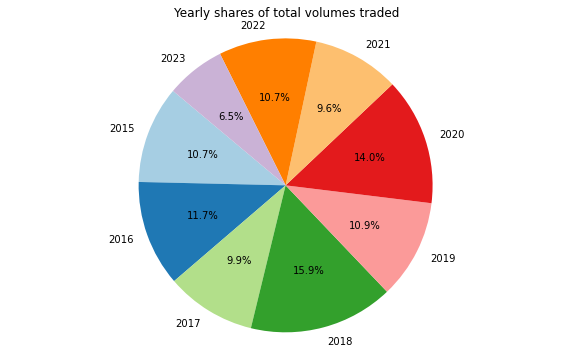

In [13]:
sizes = maxshares['Volume']
labels = maxshares['Year'].astype(str)
colors = plt.cm.Paired(range(len(sizes)))
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')

# Set Title for the Pie Chart
plt.title('Yearly shares of total volumes traded')

# Display Pie Chart
plt.show()


**Analysis 2: Amazon's yearly stock performance <br><br> This is to visually represent Amazon's quarterly adjusted closing stock prices across multiple years. The design facilitates easy year-over-year comparison, aiding in identifying trends or patterns in Amazon's stock performance.**

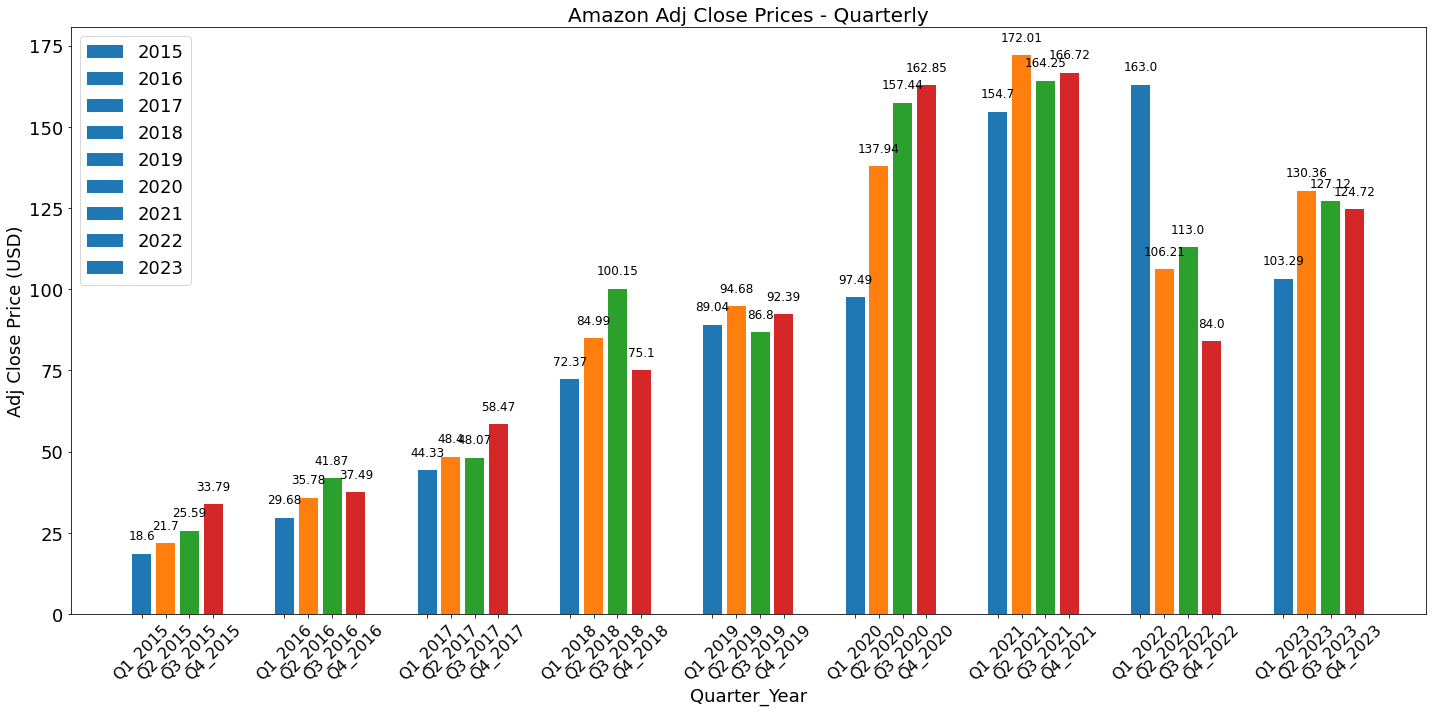

In [14]:
def plot_quarterly_bar_chart(data, column='Adj Close'):
    """
    Function to plot separate bar charts for each year's quarterly data in one frame.
    """
    data_copy = data.copy()  # Make a deep copy to avoid modifying the original data

    if data_copy.empty or column not in data_copy.columns:
        print("Invalid DataFrame or column name")
        return
    
    # Extract Year and Quarter information
    data_copy['Year'] = data_copy.index.year
    data_copy['Quarter'] = data_copy.index.to_period("Q")
    
    # Group by Year and Quarter, and select the last value of the specified column
    quarterly_data = data_copy.groupby(['Year', 'Quarter'])[column].last().reset_index()

    # Get unique years
    years = quarterly_data['Year'].unique()

    # Set colors for each quarter
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Create x ticks and labels
    x_ticks = []
    x_labels = []

    plt.figure(figsize=(20, 10))

    # Plot bar chart for each year
    for i, year in enumerate(years):
        year_data = quarterly_data[quarterly_data['Year'] == year]
        x_pos = np.arange(len(year_data)) + i * (len(year_data) + 2)
        x_ticks.extend(x_pos)
        x_labels.extend([f"Q{idx+1}_{year}" for idx in range(len(year_data))])
        
        bars = plt.bar(x_pos, year_data[column], color=colors, label=f'{year}')
        
        for bar, value in zip(bars, year_data[column]):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * max(quarterly_data[column]), 
                     str(round(value, 2)), ha='center', va='bottom', fontsize=12)

    plt.xticks(x_ticks, x_labels, rotation=45, fontsize=16)
    plt.yticks(fontsize=18)
    plt.title(f'Amazon {column} Prices - Quarterly', fontsize=20)
    plt.ylabel(f'{column} Price (USD)', fontsize=18)
    plt.xlabel('Quarter_Year', fontsize=18)
    plt.legend(fontsize=18)

    plt.tight_layout()
    plt.show()

# Calling the function
plot_quarterly_bar_chart(amzn_data)




In [15]:
amzn_data_strat1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600


# STRATEGY 1: Predicting next day's price movements

**To determine the buy or sell signal for a given trading day, we look at the closing price of the next trading day:<br>
Buy Signal: If the next trading day's close price is greater than today's close price.<br>
Sell Signal: If the next trading day's close price is less than or equal to today's close price**

In [16]:
# If tomorrow's close price is greater than today's close price then 'buy' else 'sell'
# -1 represents 'sell signal', whereas 1 represents 'buy signal'

amzn_data_strat1['signal'] = np.where(amzn_data_strat1['Close'].shift(-1) > amzn_data_strat1['Close'], 1, -1)
amzn_data_strat1

,Open,High,Low,Close,Adj Close,Volume,signal
Date,,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,-1
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,-1
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,1
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,1
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,-1
...,...,...,...,...,...,...,...
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400,-1
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000,1
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600,1


**Checking for Nan values in amzn_data_strat1**

In [17]:
amzn_data_strat1['signal'].isna().sum()

0

**Compute the Correlation Matrix - <br> 1. The corr() function calculates the pairwise correlation of columns, excluding NA/null values.The correlation coefficient ranges from -1 to 1. <br>1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.<br> 2. Heatmaps are great for visually representing correlation matrices as it provides an easily interpretable color-coded matrix.**

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999737  0.999682  0.999354   0.999354 -0.049662   
High       0.999737  1.000000  0.999613  0.999696   0.999696 -0.043780   
Low        0.999682  0.999613  1.000000  0.999709   0.999709 -0.057947   
Close      0.999354  0.999696  0.999709  1.000000   1.000000 -0.050991   
Adj Close  0.999354  0.999696  0.999709  1.000000   1.000000 -0.050991   
Volume    -0.049662 -0.043780 -0.057947 -0.050991  -0.050991  1.000000   
signal    -0.042996 -0.042250 -0.042002 -0.042153  -0.042153  0.001775   

             signal  
Open      -0.042996  
High      -0.042250  
Low       -0.042002  
Close     -0.042153  
Adj Close -0.042153  
Volume     0.001775  
signal     1.000000  


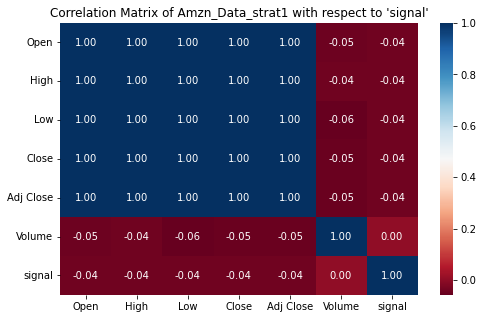

Open        -0.042996
High        -0.042250
Low         -0.042002
Close       -0.042153
Adj Close   -0.042153
Volume       0.001775
signal       1.000000
Name: signal, dtype: float64


In [18]:
correlation_matrix = amzn_data_strat1.corr()
# Display the Correlation Matrix
print(correlation_matrix)

# Visualize the Correlation Matrix Using a Heatmap

plt.figure(figsize=(8, 5))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")  # Plot the correlation heatmap with specified parameters
plt.title("Correlation Matrix of Amzn_Data_strat1 with respect to 'signal'") # Add title

# Display the heatmap
plt.show()

# Extract the 'signal' column from the correlation matrix
signal_correlation = correlation_matrix['signal']

# Print the correlations of each column with respect to 'signal'
print(signal_correlation)



**Feature Engineering & defining features:**

In [19]:
# Defining feature variable 'X' and target variable 'Y'
X = amzn_data_strat1.drop(columns=['signal']).copy()
Y = amzn_data_strat1['signal']

**Splitting the strategy 1 data into training and test datasets:**

In [20]:
# Split the data into training and test sets with an 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Implementing Machine Learning algorithms: 

**The Classifiers that are to be used during this process are as follows: <br>
    1. KNN Classifier <br>
    2. Random Forest Classifier <br>
    3. Gradient Boosting Classifier <br>
    4. Support Vector Machine (SVM) Classifier <br>
    5. XGBoost Classifier**

**1. Applying the KNN classifier and fitting it on the training dataset (using its default parameters):**

In [21]:
# Model Training
# Create an instance of the classifier with n_jobs=1
knn_clf = KNeighborsClassifier(n_jobs=1)

# Fit the classifier on the training dataset
knn_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array

# Make predictions on the test set
Y_pred = knn_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'KNN Classifier Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

KNN Classifier Accuracy: 54.20%
Confusion Matrix:
[[ 98 112]
 [ 90 141]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.56      0.61      0.58       231

    accuracy                           0.54       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.54      0.54      0.54       441



**2. Applying the Random Forest classifier and fitting on training dataset (using its default parameters):**

In [22]:
# Initialize the Random Forest Classifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)

# Fit the classifier on the training dataset
rf_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_rf = rf_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Random Forest Model Accuracy: 51.70%
Confusion Matrix:
[[ 98 112]
 [ 90 141]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.56      0.61      0.58       231

    accuracy                           0.54       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.54      0.54      0.54       441



**3. Applying Gradient Boosting classifier and fitting on training dataset (using its default parameters):**

In [23]:
# Initialize the Gradient Boosting Classifier with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the classifier on the training dataset
gb_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_gb = gb_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Gradient Boosting Model Accuracy: 50.79%
Confusion Matrix:
[[ 98 112]
 [ 90 141]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.56      0.61      0.58       231

    accuracy                           0.54       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.54      0.54      0.54       441



**4. Applying Support Vector Machine (SVM) classifier and fitting on training dataset (using its default parameters):**

In [24]:
# Initialize the SVM Classifier with default parameters
svm_clf = SVC(random_state=42)

# Fit the classifier on the training dataset
svm_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_svm = svm_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

SVM Model Accuracy: 51.93%
Confusion Matrix:
[[ 98 112]
 [ 90 141]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.56      0.61      0.58       231

    accuracy                           0.54       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.54      0.54      0.54       441



**5. Applying XGBoost classifier and fitting on training dataset (using its default parameters):**

In [25]:
# Map the labels
Y_train_mapped = Y_train.map({-1: 0, 1: 1})
Y_test_mapped = Y_test.map({-1: 0, 1: 1})

# Initialize and train the XGBoost Classifier
clf = XGBClassifier()
clf.fit(X_train, Y_train_mapped)

# Predict using the test set
Y_pred_mapped = clf.predict(X_test)

# Map predictions back to original labels
Y_pred = pd.Series(Y_pred_mapped).map({0: -1, 1: 1}).values

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 53.74%
Confusion Matrix:
[[ 99 111]
 [ 93 138]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.55      0.60      0.57       231

    accuracy                           0.54       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.54      0.54      0.54       441



### Evaluate all the Classifiers on Test dataset:

**1. Evaluating KNN Classifier:**

In [26]:
# Initialize and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict using the test set
Y_pred_knn = knn.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn))


Accuracy: 54.42%
Confusion Matrix:
[[102 108]
 [ 93 138]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.49      0.50       210
           1       0.56      0.60      0.58       231

    accuracy                           0.54       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.54      0.54      0.54       441



**2. Evaluating Random Forest Classifier:**

In [27]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict using the test set
Y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))


Accuracy: 51.70%
Confusion Matrix:
[[ 90 120]
 [ 93 138]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.43      0.46       210
           1       0.53      0.60      0.56       231

    accuracy                           0.52       441
   macro avg       0.51      0.51      0.51       441
weighted avg       0.51      0.52      0.51       441



**3. Evaluating Gradient Boosting Classifier:**

In [28]:
# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, Y_train)

# Predict using the test set
Y_pred_gbc = gbc.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_gbc = accuracy_score(Y_test, Y_pred_gbc)
print(f"Accuracy: {accuracy_gbc * 100:.2f}%")

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(Y_test, Y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix_gbc)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_gbc))


Accuracy: 50.79%
Confusion Matrix:
[[ 53 157]
 [ 60 171]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.25      0.33       210
           1       0.52      0.74      0.61       231

    accuracy                           0.51       441
   macro avg       0.50      0.50      0.47       441
weighted avg       0.50      0.51      0.48       441



**4. Evaluating SVM Classifier:(This cell is commented as execution was extremely time-consuming)**

In [30]:
# # Initialize and train the SVM Classifier
# svm_clf = SVC(kernel='linear', C=1, random_state=42)
# svm_clf.fit(X_train, Y_train)

# # Predict using the test set
# Y_pred_svm = svm_clf.predict(X_test)

# # Evaluate the model's performance

# # Accuracy
# accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
# print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# # Confusion Matrix
# conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
# print("Confusion Matrix:")
# print(conf_matrix_svm)

# # Classification Report
# print("Classification Report:")
# print(classification_report(Y_test, Y_pred_svm))


**5. Evaluating XGBoost Classifier:**

In [31]:
# Map the labels
Y_train_mapped = Y_train.map({-1: 0, 1: 1})
Y_test_mapped = Y_test.map({-1: 0, 1: 1})

# Initialize and train the XGBoost Classifier
clf = XGBClassifier()
clf.fit(X_train, Y_train_mapped)

# Predict using the test set
Y_pred_mapped = clf.predict(X_test)

# Map predictions back to original labels
Y_pred = pd.Series(Y_pred_mapped).map({0: -1, 1: 1}).values

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 53.74%
Confusion Matrix:
[[ 99 111]
 [ 93 138]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       210
           1       0.55      0.60      0.57       231

    accuracy                           0.54       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.54      0.54      0.54       441



### Observations:

**1. The highest accuracy was obtained from KNN Classifier resuting in 54.42% and the lowest accuracy was obtained from Gradient Boosting classifier leading to 50.79%. <br> 2. An interesting point to note is that although Gradient boosting is an optimization technique, it resulted in the lowest accuracy; when compared to the remaining classifiers implemented such as Random forest (51.70%) and SVM (51.93%). But XGBoost (eXtreme Gradient Boosting - leverages efficiency and optimization) has resulted in better model performance than the rest, which upon evaluating resulted in 53.74% accuracy proving to be a better algorithm (than GB) that employs optimization techniques for efficiency and accuracy. <br> 3.  The data portrayed to be non-optimal and this could be a reason for poor accuracy rates. This problem is well-handled with the help of STRATEGY 2 approach.**

# STRATEGY 2: Moving average crossover

**In this approach, we utilize the power of Moving Averages. A crossover between two moving averages represents potential market entry and exit points: <br> Golden Cross: A bullish signal where the 50-day MA crosses above the 200-day MA.<br>
Death Cross: A bearish signal where the 50-day MA crosses below the 200-day MA. <br><br> To identify these crossovers, we'll calculate the 50-day and 200-day MAs and observe their interactions.**

In [33]:
# Calculating 50-day and 200-day moving averages

amzn_data_strat2['50_Day_MA'] = amzn_data_strat2['Close'].rolling(window=50).mean()
amzn_data_strat2['200_Day_MA'] = amzn_data_strat2['Close'].rolling(window=200).mean()

# Creating target labels for Strategy 2 (Golden Cross)

amzn_data_strat2['Signal'] = np.where(amzn_data_strat2['50_Day_MA'] > amzn_data_strat2['200_Day_MA'], 1, 0)

In [34]:
amzn_data_strat2 # Displaying the moving averages in our dataframe

,Open,High,Low,Close,Adj Close,Volume,50_Day_MA,200_Day_MA,Signal
Date,,,,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,NaN,NaN,0
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,NaN,NaN,0
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,NaN,NaN,0
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,NaN,NaN,0
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400,134.955801,112.78930,1
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000,134.768201,112.97375,1
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600,134.711401,113.15660,1


**Data Preprocessing: To ensure there are no NaN values, especially after calculating the MAs.**

In [35]:
amzn_data_strat2.dropna(inplace = True) # Dropping NaN values

In [36]:
amzn_data_strat2.isna().sum() # Ensuring there are no NaN values 

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
50_Day_MA     0
200_Day_MA    0
Signal        0
dtype: int64

**Now we find out the correlation of each column with respect to the Moving Aversges and drop all the negatively correlated columns**

                Open      High       Low     Close  Adj Close    Volume  \
Open        1.000000  0.999672  0.999603  0.999195   0.999195 -0.094877   
High        0.999672  1.000000  0.999518  0.999622   0.999622 -0.087876   
Low         0.999603  0.999518  1.000000  0.999637   0.999637 -0.104676   
Close       0.999195  0.999622  0.999637  1.000000   1.000000 -0.096380   
Adj Close   0.999195  0.999622  0.999637  1.000000   1.000000 -0.096380   
Volume     -0.094877 -0.087876 -0.104676 -0.096380  -0.096380  1.000000   
50_Day_MA   0.983663  0.984195  0.982630  0.983185   0.983185 -0.077202   
200_Day_MA  0.932843  0.934408  0.931401  0.932789   0.932789 -0.107900   
Signal     -0.101807 -0.105738 -0.098648 -0.102386  -0.102386  0.062483   

            50_Day_MA  200_Day_MA    Signal  
Open         0.983663    0.932843 -0.101807  
High         0.984195    0.934408 -0.105738  
Low          0.982630    0.931401 -0.098648  
Close        0.983185    0.932789 -0.102386  
Adj Close    0.9831

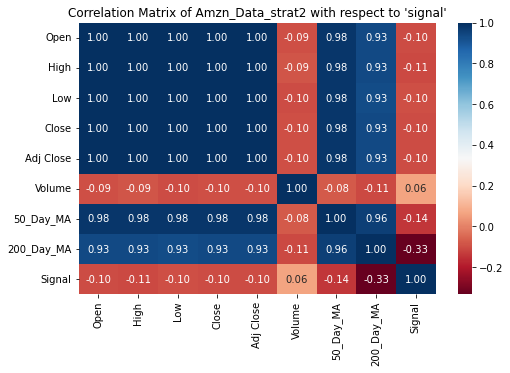

Open         -0.101807
High         -0.105738
Low          -0.098648
Close        -0.102386
Adj Close    -0.102386
Volume        0.062483
50_Day_MA    -0.144045
200_Day_MA   -0.334080
Signal        1.000000
Name: Signal, dtype: float64


In [37]:
correlation_matrix = amzn_data_strat2.corr()
# Display the Correlation Matrix
print(correlation_matrix)

# Visualize the Correlation Matrix Using a Heatmap

plt.figure(figsize=(8, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")  # Plot the correlation heatmap with specified parameters
plt.title("Correlation Matrix of Amzn_Data_strat2 with respect to 'signal'") # Add title

# Display the heatmap
plt.show()

# Extract the 'signal' column from the correlation matrix
signal_correlation = correlation_matrix['Signal']

# Print the correlations of each column with respect to 'signal'
print(signal_correlation)



**Dropping the negatively correlated columns along with columns containing outliers:**

In [38]:
amzn_data_strat2 = amzn_data_strat2.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

amzn_data_strat2

,Adj Close,50_Day_MA,200_Day_MA,Signal
Date,,,,
2015-10-16,28.538000,26.220870,21.667815,1
2015-10-19,28.657499,26.271400,21.733972,1
2015-10-20,28.044001,26.308280,21.798645,1
2015-10-21,27.788500,26.336590,21.863765,1
2015-10-22,28.195499,26.374590,21.930137,1
...,...,...,...,...
2023-09-27,125.980003,134.955801,112.789300,1
2023-09-28,125.980003,134.768201,112.973750,1
2023-09-29,127.120003,134.711401,113.156600,1


In [39]:
amzn_data_strat2.isna().sum() # Checking if there are any NaN values

Adj Close     0
50_Day_MA     0
200_Day_MA    0
Signal        0
dtype: int64


**Implementing Feature Engineering & defining features:**

In [40]:
# Defining feature variable 'X' and target variable 'Y'
X = amzn_data_strat2.drop(columns=['Signal']).copy()
Y = amzn_data_strat2['Signal']

**Splitting the strategy 2 data into training and test datasets:**

In [41]:
# Split the data into training and test sets with an 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Implementing Machine Learning algorithms: 

**The Classifiers that are to be used during this process are as follows: <br>
    1. KNN Classifier <br>
    2. Random Forest Classifier <br>
    3. Gradient Boosting Classifier <br>
    4. Support Vector Machine (SVM) Classifier <br>
    5. XGBoost Classifier**

**1. Applying the KNN classifier and fitting it on the training dataset (using its default parameters):**

In [42]:
# Model Training
# Create an instance of the classifier with n_jobs=1
knn_clf = KNeighborsClassifier(n_jobs=1)

# Fit the classifier on the training dataset
knn_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array

# Make predictions on the test set
Y_pred = knn_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'KNN Classifier Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

KNN Classifier Accuracy: 98.50%
Confusion Matrix:
[[ 88   2]
 [  4 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.99      0.99      0.99       401



**2. Applying the Random Forest classifier and fitting it on the training dataset (using its default parameters):**

In [43]:
# Initialize the Random Forest Classifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)

# Fit the classifier on the training dataset
rf_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_rf = rf_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Random Forest Model Accuracy: 99.00%
Confusion Matrix:
[[ 88   2]
 [  4 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.99      0.99      0.99       401



**3. Applying the Gradient Boosting classifier and fitting it on the training dataset (using its default parameters):**

In [44]:
# Initialize the Gradient Boosting Classifier with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the classifier on the training dataset
gb_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_gb = gb_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb * 100:.2f}%')


conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Gradient Boosting Model Accuracy: 98.75%
Confusion Matrix:
[[ 88   2]
 [  4 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.99      0.99      0.99       401



**4. Applying the SVM classifier and fitting it on the training dataset (using its default parameters):**

In [45]:
# Initialize the SVM Classifier with default parameters
svm_clf = SVC(random_state=42)

# Fit the classifier on the training dataset
svm_clf.fit(X_train, Y_train.ravel())  # Use ravel() to convert Y_train to 1D array if it's 2D

# Make predictions on the test set
Y_pred_svm = svm_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

SVM Model Accuracy: 97.01%
Confusion Matrix:
[[ 88   2]
 [  4 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.99      0.99      0.99       401



**5. Applying the XGBoost classifier and fitting it on the training dataset (using its default parameters):**

In [46]:
# Initialize and train the XGBoost Classifier
clf = XGBClassifier()
clf.fit(X_train, Y_train)

# Predict using the test set
Y_pred_mapped = clf.predict(X_test)

# Map predictions back to original labels
Y_pred = pd.Series(Y_pred_mapped).map({0: -1, 1: 1}).values

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 77.06%


### Evaluate all the Classifiers on Test dataset:

**1. Evaluating KNN classifier**

In [47]:
# Initialize and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict using the test set
Y_pred_knn = knn.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn))


Accuracy: 99.00%
Confusion Matrix:
[[ 90   0]
 [  4 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.99      0.99       401
weighted avg       0.99      0.99      0.99       401



**2. Evaluating Random forest classifier**

In [48]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict using the test set
Y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))


Accuracy: 99.00%
Confusion Matrix:
[[ 89   1]
 [  3 308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       1.00      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.99      0.99       401
weighted avg       0.99      0.99      0.99       401



**3. Evaluating Gradient Boosting classifier**

In [49]:
# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, Y_train)

# Predict using the test set
Y_pred_gbc = gbc.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_gbc = accuracy_score(Y_test, Y_pred_gbc)
print(f"Accuracy: {accuracy_gbc * 100:.2f}%")

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(Y_test, Y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix_gbc)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_gbc))


Accuracy: 98.75%
Confusion Matrix:
[[ 88   2]
 [  3 308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.99      0.99      0.99       401



**4. Evaluating the SVM classifier**

In [50]:
# Initialize and train the SVM Classifier
svm_clf = SVC(kernel='linear', C=1, random_state=42)
svm_clf.fit(X_train, Y_train)

# Predict using the test set
Y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm))


Accuracy: 99.50%
Confusion Matrix:
[[ 90   0]
 [  2 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.99      1.00       311

    accuracy                           1.00       401
   macro avg       0.99      1.00      0.99       401
weighted avg       1.00      1.00      1.00       401



**5. Evaluating XGBoost classifier**

In [51]:
# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgb_clf.fit(X_train, Y_train)

# Predict using the test set
Y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))


Accuracy: 99.00%
Confusion Matrix:
[[ 88   2]
 [  2 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.99      0.99      0.99       311

    accuracy                           0.99       401
   macro avg       0.99      0.99      0.99       401
weighted avg       0.99      0.99      0.99       401



### Observations:

**1. The highest accuracy was obtained from SVM Classifier resuting in 99.50% and the lowest accuracy was obtained from Gradient Boosting classifier leading to 98.75%. <br> 2. A fascinating observation to make is that the remaining Classifiers, that is KNN, Random forest and XGboost have resulted in equal accuracy rate of 99.00% which leaves us with an extremely narrow difference.<br> 3. It is quite evident that calculating the moving averages of the stocks have resulted in optimal data followed by efficient predictions and accuracy rates.**

# EXTRA CREDIT

### Try to tune some classifiers (you decide which ones, anywill do), by changing their default parameters.<br> 
**Classifiers chosen to tune are KNN, Gradient Boosting and Random Forest for STRATEGY 1**<br>**The reason for proceeding with Strategy 1: The accuracy is lower for the models, hence we try implementing Hyperparameter Tuning to increase accuracy**

In [52]:
# Defining feature variable 'X' and target variable 'Y'
X = amzn_data_strat1.drop(columns=['signal']).copy()
Y = amzn_data_strat1['signal']

# Split the data into training and test sets with an 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Hyperparameter Tuning of KNN Classifier: <br>
**The following are the parameters that have been changed in order to leverage efficiency - <br><br> 1. Number of Neighbors (n_neighbors): A range of values from 1 to 20 was tested for the n_neighbors parameter.
5-fold cross-validation was used to evaluate the accuracy of the KNN model for each value of n_neighbors.
The optimal number of neighbors was determined based on the highest average cross-validation accuracy.<br> 2. Weight Function (weights): After identifying the optimal number of neighbors, the KNN classifier was trained with a weight function set to 'distance'. This means that closer neighbors of a query point will have a greater influence on the prediction than neighbors that are farther away.**


In [53]:
from sklearn.model_selection import cross_val_score

# List to hold the average accuracy for each value of n_neighbors
cv_scores = []

# List of values for n_neighbors
neighbors = list(range(1, 21))

for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determine the best n_neighbors
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with an accuracy of {max(cv_scores) * 100:.2f}%")

# Train and evaluate the KNN classifier with the optimal number of neighbors
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn_optimal.fit(X_train, Y_train)
Y_pred_knn_optimal = knn_optimal.predict(X_test)

accuracy_knn_optimal = accuracy_score(Y_test, Y_pred_knn_optimal)
print(f"Optimized Accuracy: {accuracy_knn_optimal * 100:.2f}%")


conf_matrix_knn_optimal = confusion_matrix(Y_test, Y_pred_knn_optimal)
print("Optimized Confusion Matrix:")
print(conf_matrix_knn_optimal)

print("Optimized Classification Report:")
print(classification_report(Y_test, Y_pred_knn_optimal))


The optimal number of neighbors is 5 with an accuracy of 52.21%
Optimized Accuracy: 53.51%
Optimized Confusion Matrix:
[[105 105]
 [100 131]]
Optimized Classification Report:
              precision    recall  f1-score   support

          -1       0.51      0.50      0.51       210
           1       0.56      0.57      0.56       231

    accuracy                           0.54       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.53      0.54      0.53       441



**Takeaways: <br> The best number of neighbors for the KNN classifier, determined through hyperparameter tuning, is 5.<br>
The cross-validation accuracy for this optimal number of neighbors is 52.21%, while the accuracy on the test set slightly improved to 53.51%. This suggests that the model's performance is relatively consistent across both the validation and test datasets.**

### Hyperparameter Tuning of Random Forest Classifier: <br>
**The following are the parameters that have been changed in order to leverage efficiency (variety of parameters tested) - <br><br>1. Number of Trees (n_estimators): The code tests four different values to determine the optimal number of trees in the random forest, ranging from smaller forests (50 trees) to much larger ones (500 trees).<br>2. Tree Depth (max_depth): Five possible values are explored, including the possibility of trees with unlimited depth (None) and trees with varying constrained depths (from 10 to 40).<br>3. Minimum Samples for Split (min_samples_split): The model examines 3 possible threshold values.<br>4. Minimum Samples for a Leaf (min_samples_leaf): This determines the smallest number of samples required to be at a leaf node. Three values (1, 2, 4) are tested.<br>5. A 3-fold cross-validation is employed during the grid search (specified by cv=3).**

In [54]:
# Random forest

from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train.ravel())

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train and evaluate the classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params, random_state=42)
rf_clf_best.fit(X_train, Y_train.ravel())
Y_pred_rf_best = rf_clf_best.predict(X_test)

accuracy_rf_best = accuracy_score(Y_test, Y_pred_rf_best)
print(f'Optimized Random Forest Model Accuracy: {accuracy_rf_best * 100:.2f}%')

conf_matrix_best = confusion_matrix(Y_test, Y_pred_rf_best)
print("Optimized Confusion Matrix:")
print(conf_matrix_best)

print("Optimized Classification Report:")
print(classification_report(Y_test, Y_pred_rf_best))


Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest Model Accuracy: 52.83%
Optimized Confusion Matrix:
[[ 55 155]
 [ 53 178]]
Optimized Classification Report:
              precision    recall  f1-score   support

          -1       0.51      0.26      0.35       210
           1       0.53      0.77      0.63       231

    accuracy                           0.53       441
   macro avg       0.52      0.52      0.49       441
weighted avg       0.52      0.53      0.50       441



### Hyperparameter Tuning of Gradient Boosting Classifier: <br>
**The following are the parameters that have been changed in order to leverage efficiency (variety of parameters tested):<br><br>1. Number of Boosting Stages (n_estimators): 3 different values are tested to determine the optimal number of boosting stages (trees) for the gradient boosting model, specifically 50, 100, and 200 stages.<br>2. Tree Depth (max_depth): The code examines 4 depths for individual trees, ranging from shallow trees (depth of 3) to deeper trees (depth of 9).<br>3. Learning Rate: This tuning parameter scales the contribution of each tree. Three values are considered: 0.001, 0.01, and 0.1.<br>4. Minimum Samples for Split and Leaf: The grid search tests thresholds of 2, 4, and 6 for split. The smallest number of samples required to be at a leaf node is explored with values of 1, 2, and 3.<br>5.The grid search is conducted with a 3-fold cross-validation (cv=3), segmenting the training data into three portions.**

In [55]:
# Gradient Boosting

from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the grid search object
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train, Y_train.ravel())

# Get the best parameters from the grid search
best_params_gb = grid_search_gb.best_params_
print(f"Best Parameters for Gradient Boosting: {best_params_gb}")

# Train and evaluate the classifier with the best parameters
gb_clf_best = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_clf_best.fit(X_train, Y_train.ravel())
Y_pred_gb_best = gb_clf_best.predict(X_test)

accuracy_gb_best = accuracy_score(Y_test, Y_pred_gb_best)
print(f'Optimized Gradient Boosting Model Accuracy: {accuracy_gb_best * 100:.2f}%')

conf_matrix_best = confusion_matrix(Y_test, Y_pred_gb_best)
print("Optimized Confusion Matrix:")
print(conf_matrix_best)

print("Optimized Classification Report:")
print(classification_report(Y_test, Y_pred_gb_best))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Gradient Boosting Model Accuracy: 51.93%
Optimized Confusion Matrix:
[[ 36 174]
 [ 38 193]]
Optimized Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.17      0.25       210
           1       0.53      0.84      0.65       231

    accuracy                           0.52       441
   macro avg       0.51      0.50      0.45       441
weighted avg       0.51      0.52      0.46       441



## Strategy Comparison: Strategy 1 vs. Strategy 2

### Strategy 1: Price Movement Prediction
**Objective**: Predict next day's price movements using current day's closing price.
#### Signal Generation:
**Buy Signal**: Tomorrow’s close price > Today’s close price.

**Sell Signal**: Tomorrow’s close price ≤ Today’s close price.

**Data Handling**: Direct use of closing prices without significant preprocessing.
#### Algorithm Accuracy:
**Highest**: KNN Classifier (54.42%).

**Lowest**: Gradient Boosting (50.79%).

**Data Optimization**: Non-optimal data used.

**Challenges**: Lower accuracy due to non-optimized data.

### Strategy 2: Moving Average Crossover

**Objective**: Leverage Moving Averages crossover for potential buy/sell signals.

#### Signal Generation:

**Golden Cross**: Bullish, 50-day MA crosses above 200-day MA.

**Death Cross**: Bearish, 50-day MA crosses below 200-day MA.

**Data Handling**: Optimized with null handling, correlation analysis, and focusing on adjusted close price.

#### Algorithm Accuracy:

**Highest**: SVM Classifier (99.50%).

**Lowest**: Gradient Boosting (98.75%).

**Data Optimization**: Calculating moving averages leads to more optimized data.

**Advantages**: Higher accuracy due to data optimization and refined signal generation.

### Key Differences:

#### Data Preprocessing & Optimization:
Strategy 2 performs more extensive data preprocessing and optimization.
Strategy 1 uses data directly with minimal handling.

#### Signal Generation:
Strategy 1 relies solely on price movements.
Strategy 2 utilizes Moving Average crossovers, providing refined signals.

#### Algorithm Accuracy:
Strategy 2’s classifiers exhibit significantly higher accuracy than those in Strategy 1.
Overall Reliability:
Strategy 2 is more reliable due to optimized data and higher classifier accuracy.
